In [9]:
import nltk
nltk.download()
#Select Download all packages


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


#Task 1 (5 points): Text Preprocessing and Basic Analysis with NLTK

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
fo = open("Harry Potter Book 1.txt", "r", encoding='utf-8')
mytext = fo.read()

In [22]:
#1.2  Tokenize sentences and words. Print lens of sentences and tokens and only print
#the first 20 words
import re, pprint, string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
len(mytext)
tokens = word_tokenize(mytext)
type(tokens)
print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens))
print("First 20 words: \n", tokens[0:20])

The number of sentences = 6394
Number of words after word tokenizing:  98781
First 20 words: 
 ['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [99]:
#1.3  Remove punctuations. Only print the first 20 words
from nltk.tokenize import wordpunct_tokenize
import string, os
from nltk.tokenize import RegexpTokenizer

toker = nltk.RegexpTokenizer(r"\w+")
no_punct = toker.tokenize(mytext)
print("Number of words after punctuation remove: ", len(no_punct))
print(no_punct[0:20])


Number of words after punctuation remove:  80646
['Harry', 'Potter', 'and', 'the', 'Sorcerer', 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley', 'of', 'number', 'four']


In [177]:
#1.4 Remove stop words and count the distinct cleaned words.
from nltk.corpus import stopwords
from nltk.probability import FreqDist
#USE FreqDist()
freqdist = FreqDist(word.lower() for word in no_punct if word.lower() not in stopwords.words('english'))
print(freqdist)

#OR 
filtered_words = [word.lower() for word in no_punct if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words))
print(filtered_words[0:20])


<FreqDist with 5628 samples and 40785 outcomes>
Number of words without stop words:  40785
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


In [130]:
#1.5  Lemmatize the cleaned words and count the distinct lemmatized words. What’s
#different from 1.4? Please clearly explain.
lemma = nltk.WordNetLemmatizer()
word_lemmatized = [lemma.lemmatize(t) for t in filtered_words]
print(FreqDist(word_lemmatized))
print("The result is different with 1.4 because many words have the same lemma, so it reduced the number of distinct words, but the number of outcomes are still the same.  Some of these outcomes have the same value.")


<FreqDist with 5109 samples and 40785 outcomes>
The result is different with 1.4 because many words have the same lemma, so it reduced the number of distinct words, but the number of outcomes are still the same.  Some of these outcomes have the same value.


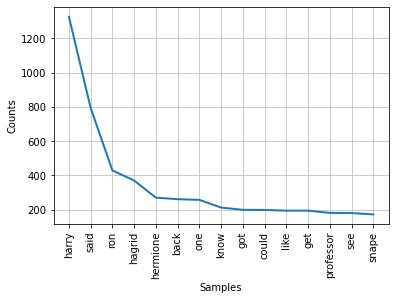

[('harry', 1327),
 ('said', 794),
 ('ron', 429),
 ('hagrid', 370),
 ('hermione', 270),
 ('back', 261),
 ('one', 257),
 ('know', 212),
 ('got', 199),
 ('could', 198),
 ('like', 194),
 ('get', 194),
 ('professor', 181),
 ('see', 180),
 ('snape', 172)]

In [148]:
#1.6 Calculate the word distribution and plot and list only top 15 words
freqdist.plot(15)
freqdist.most_common(15)

###Task 2 (4 points): Word Clouds

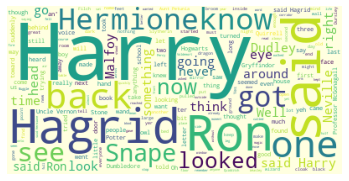

In [187]:
#2.1 (1.5 points) Follow the wordcloud simple example to generate the word cloud without
#stopwords directly from the original text and show it. Note that you must remove the stopwords.
#Hint: Use WordCloud(stopwords=STOPWORDS).generate(mytext). The output should be similar to:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stop = set(stopwords.words('english'))
# print(len(stop), len(STOPWORDS))
wc = WordCloud(stopwords=STOPWORDS, background_color='lightyellow').generate(mytext)
plt.axis("off")
plt.imshow(wc) #, interpolation="bilinear")
plt.show()

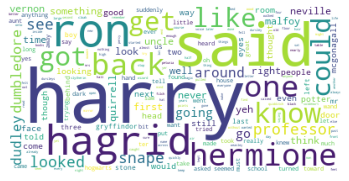

In [200]:
#2.2 (1.5 points) Generate the word cloud for the processed data in Task 1 and show the image.
#Hint: Use WordCloud().generate_from_frequencies(freq_dist). Note that freq_dist is the output of
#FreqDist(). The output should be similar to:

wcf = WordCloud(background_color='white').generate_from_frequencies(freqdist)
plt.axis("off")
plt.imshow(wcf) 
plt.show()


In [182]:
#2.3 (1 point) Compare the above two word clouds and what difference do you find? 
print("I found that all the words in the World Cloud from the FreqDist are only in Lower Case, while the first Word Cloud include words both in Upper Case and Lower Case.")

I found that all the words in the World Cloud from the FreqDist are only in Lower Case, while the first Word Cloud include words both in Upper Case and Lower Case.


###Task 3 (1 point):
3.1 Based on your experience with these NLP tasks, please compare with text data processing
and numeric data processing.

I think numeric data processing is more native to how computers normally operate. Numeric data processing therefore is faster because numeric data is already in the format that computer algorithms want.  You can perform statistical functions on numeric data better and there are many ML algorithms existed for numeric processing.  
On the other hand, text data is mostly unstructured.  It requires an extra step to process text for the computer to understand. There are languages that do not have fully developped libraries to process. Typically, to process NLP ML models requires more compute power and the latency is normally slower than with numeric data process. 
